In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import skew

In [4]:
dataset = pd.read_csv("/home/manju838/coding/env/pytorch_env/Dataset/pima-indians-diabetes.csv")
print(dataset.shape)
dataset.head()

(767, 9)


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
dataset.columns #So my columns are these wierd no.s

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [11]:
col_names = ["No. of times pregnant","Plasma glucose concentration","blood pressure","skin fold thickness","serum insulin","BMI","Diabetes pedigree function","Age","Class"]
dataset.columns = col_names
dataset

,No. of times pregnant,Plasma glucose concentration,blood pressure,skin fold thickness,serum insulin,BMI,Diabetes pedigree function,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#This method also works mainly if you don't have to rename whole list
# dataset.rename(columns = {"Old Column name1":"New Column name1","Old Column name2":"New Column name2"},inplace = True)

In [12]:
dataset.describe()

,No. of times pregnant,Plasma glucose concentration,blood pressure,skin fold thickness,serum insulin,BMI,Diabetes pedigree function,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


skewness = 0 : normally distributed.    
skewness > 0 : more weight in the left tail of the distribution.    
skewness < 0 : more weight in the right tail of the distribution. 

In [21]:
print("Skewness for No.of times pregnant:",skew(dataset.iloc[:,0]))


Skewness for No.of times pregnant: 0.9022074225220357


<AxesSubplot:ylabel='Density'>

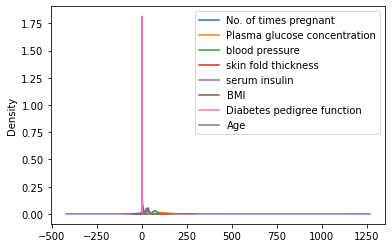

In [19]:
dataset.iloc[:,0:8].plot(kind = "density")

As we can see,Diabetes Pedigree fn needs max normalisation

In [42]:
def scale(x,min_scale,max_scale):
    return(min_scale + ((x - x.min()) / (x.max() - x.min()) )*(max_scale - min_scale))


In [43]:
#type(dataset.iloc[:,0])
print(dataset.iloc[:,0].min())
print(dataset.iloc[:,0].max())

0
17


In [44]:
d = {"Initial Values":dataset.iloc[:,0],"Final Values":scale(dataset.iloc[:,0],-1,1)}
checker_frame = pd.DataFrame(data = d)
checker_frame

,Initial Values,Final Values
0,1,-0.882353
1,8,-0.058824
2,1,-0.882353
3,0,-1.000000
4,5,-0.411765
...,...,...
762,10,0.176471
763,2,-0.764706
764,5,-0.411765
765,1,-0.882353


In [46]:
scaled_data = {"No. of times pregnant":scale(dataset.iloc[:,0],-1,1), "Plasma glucose concentration":scale(dataset.iloc[:,1],-1,1),	"blood pressure":scale(dataset.iloc[:,2],-1,1),	"skin fold thickness":scale(dataset.iloc[:,3],-1,1),	"serum insulin":scale(dataset.iloc[:,4],-1,1),	"BMI":scale(dataset.iloc[:,5],-1,1),	"Diabetes pedigree function":scale(dataset.iloc[:,6],-1,1),	"Age":scale(dataset.iloc[:,7],-1,1),	"Class":scale(dataset.iloc[:,8],0,1) }
scaled_frame = pd.DataFrame(data = scaled_data)
scaled_frame

,No. of times pregnant,Plasma glucose concentration,blood pressure,skin fold thickness,serum insulin,BMI,Diabetes pedigree function,Age,Class
0,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207154,-0.766866,-0.666667,0.0
1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,1.0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,0.0
3,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,1.0
4,-0.411765,0.165829,0.213115,-1.000000,-1.000000,-0.236960,-0.894962,-0.700000,0.0
...,...,...,...,...,...,...,...,...,...
762,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,0.0
763,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000,0.0
764,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,0.0
765,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333,1.0


In [65]:
randomised_scale = scaled_frame.sample(frac=1, random_state = 1)
randomised_scale

,No. of times pregnant,Plasma glucose concentration,blood pressure,skin fold thickness,serum insulin,BMI,Diabetes pedigree function,Age,Class
285,-0.411765,0.557789,0.377049,-0.111111,0.288416,0.153502,-0.538002,-0.566667,0.0
101,-1.000000,0.256281,0.573770,-1.000000,-1.000000,-0.329359,-0.842869,-1.000000,0.0
581,0.411765,0.216080,0.278689,-0.656566,-1.000000,-0.210134,-0.845431,0.366667,0.0
352,-0.882353,-0.095477,0.016393,-0.757576,-0.898345,-0.189270,-0.571307,-0.900000,0.0
632,-0.882353,0.286432,0.344262,-0.656566,-0.567376,-0.180328,-0.968403,-0.966667,0.0
...,...,...,...,...,...,...,...,...,...
645,-0.882353,0.678392,0.213115,-0.656566,-0.659574,-0.302534,-0.684885,-0.600000,1.0
715,-0.647059,0.738693,0.278689,-0.212121,-0.562648,0.007452,-0.238258,-0.666667,1.0
72,-0.529412,0.296482,0.409836,-0.595960,-0.361702,0.046200,-0.869342,-0.933333,0.0
235,-0.176471,0.819095,0.377049,-0.575758,-0.546099,0.070045,-0.566183,0.000000,1.0


<AxesSubplot:title={'center':'No. of times pregnant'}>

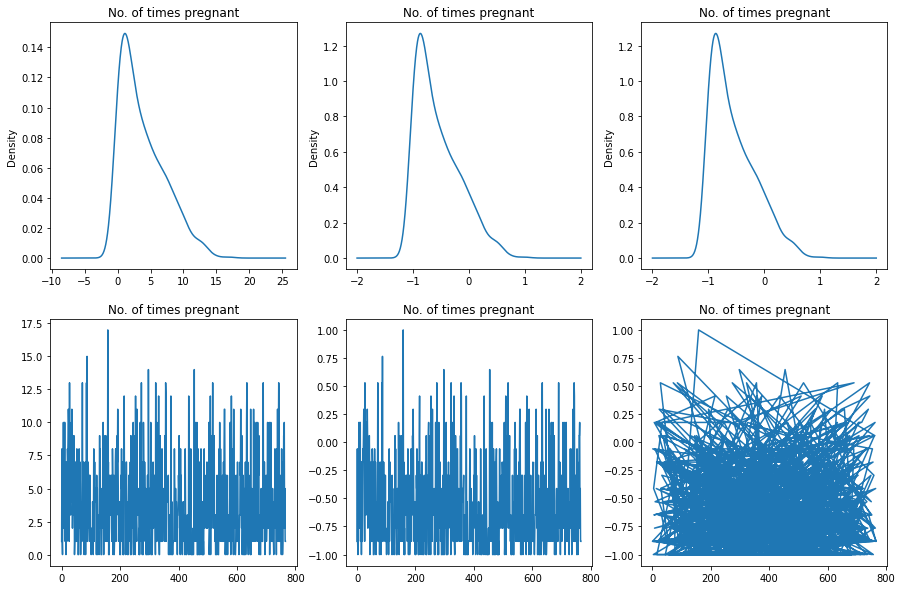

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=3)

dataset.iloc[:,0].plot(figsize=(15,10),ax=axes[0,0],kind = 'density',title = "No. of times pregnant")
scaled_frame.iloc[:,0].plot(figsize=(15,10),ax=axes[0,1],kind = 'density',title = "No. of times pregnant")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[0,2],kind = 'density',title = "No. of times pregnant")

dataset.iloc[:,0].plot(figsize=(15,10),ax=axes[1,0],kind = 'line',title = "No. of times pregnant")
scaled_frame.iloc[:,0].plot(figsize=(15,10),ax=axes[1,1],kind = 'line',title = "No. of times pregnant")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[1,2],kind = 'line',title = "No. of times pregnant")

<AxesSubplot:title={'center':'Plasma glucose concentration'}>

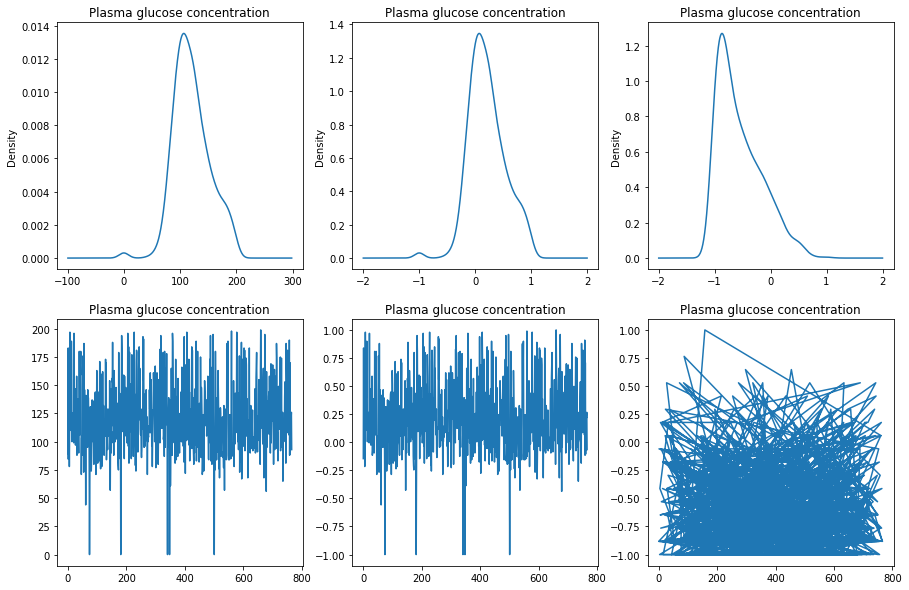

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=3)

dataset.iloc[:,1].plot(figsize=(10,10),ax=axes[0,0],kind = 'density',title = "Plasma glucose concentration")
scaled_frame.iloc[:,1].plot(figsize=(10,10),ax=axes[0,1],kind = 'density',title = "Plasma glucose concentration")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[0,2],kind = 'density',title = "Plasma glucose concentration")

dataset.iloc[:,1].plot(figsize=(10,10),ax=axes[1,0],kind = 'line',title = "Plasma glucose concentration")
scaled_frame.iloc[:,1].plot(figsize=(10,10),ax=axes[1,1],kind = 'line',title = "Plasma glucose concentration")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[1,2],kind = 'line',title = "Plasma glucose concentration")

<AxesSubplot:title={'center':'blood pressure'}>

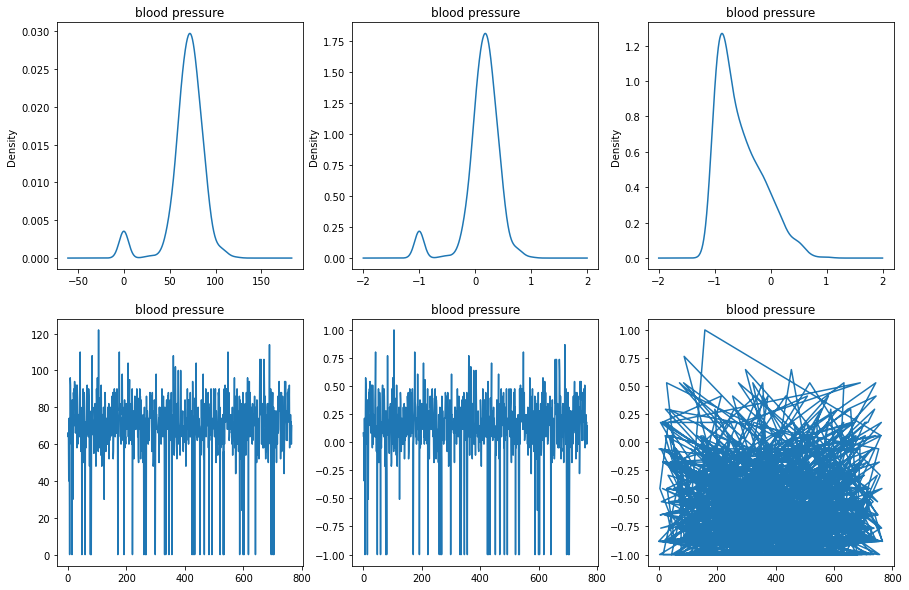

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=3)

dataset.iloc[:,2].plot(figsize=(10,10),ax=axes[0,0],kind = 'density',title = "blood pressure")
scaled_frame.iloc[:,2].plot(figsize=(10,10),ax=axes[0,1],kind = 'density',title = "blood pressure")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[0,2],kind = 'density',title = "blood pressure")

dataset.iloc[:,2].plot(figsize=(10,10),ax=axes[1,0],kind = 'line',title = "blood pressure")
scaled_frame.iloc[:,2].plot(figsize=(10,10),ax=axes[1,1],kind = 'line',title = "blood pressure")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[1,2],kind = 'line',title = "blood pressure")

<AxesSubplot:title={'center':'skin fold thickness'}>

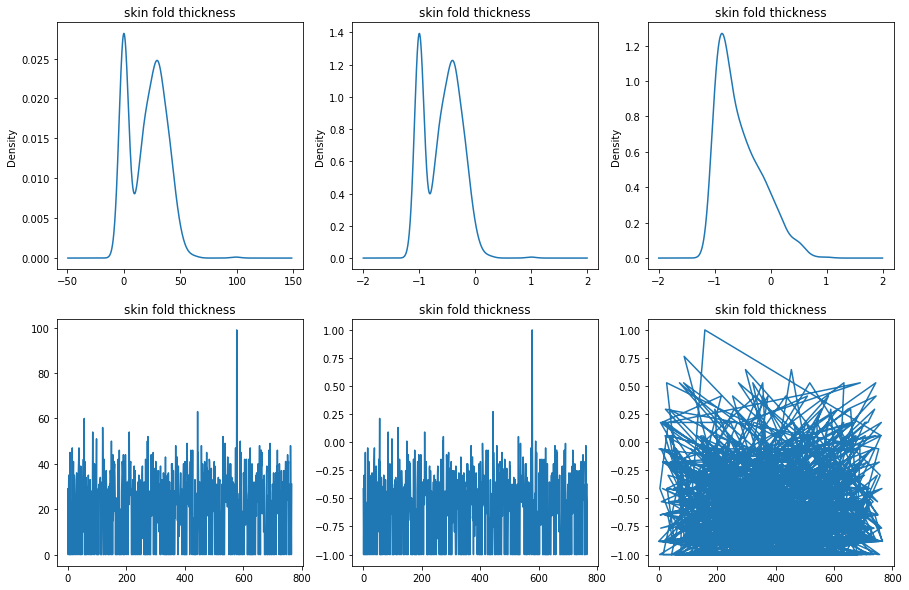

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=3)

dataset.iloc[:,3].plot(figsize=(10,10),ax=axes[0,0],kind = 'density',title = "skin fold thickness")
scaled_frame.iloc[:,3].plot(figsize=(10,10),ax=axes[0,1],kind = 'density',title = "skin fold thickness")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[0,2],kind = 'density',title = "skin fold thickness")

dataset.iloc[:,3].plot(figsize=(10,10),ax=axes[1,0],kind = 'line',title = "skin fold thickness")
scaled_frame.iloc[:,3].plot(figsize=(10,10),ax=axes[1,1],kind = 'line',title = "skin fold thickness")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[1,2],kind = 'line',title = "skin fold thickness")

<AxesSubplot:title={'center':'serum insulin'}>

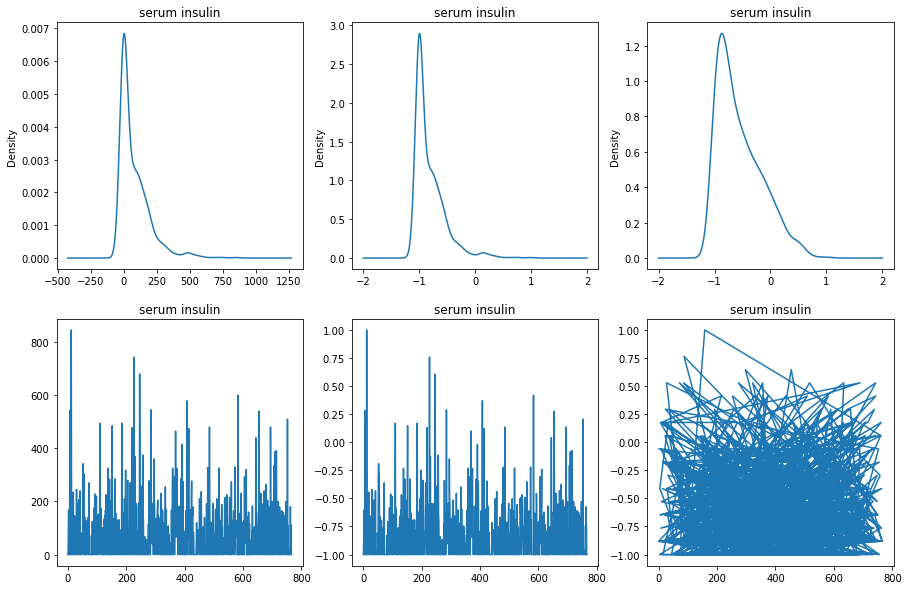

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=3)

dataset.iloc[:,4].plot(figsize=(10,10),ax=axes[0,0],kind = 'density',title = "serum insulin")
scaled_frame.iloc[:,4].plot(figsize=(10,10),ax=axes[0,1],kind = 'density',title = "serum insulin")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[0,2],kind = 'density',title = "serum insulin")

dataset.iloc[:,4].plot(figsize=(10,10),ax=axes[1,0],kind = 'line',title = "serum insulin")
scaled_frame.iloc[:,4].plot(figsize=(10,10),ax=axes[1,1],kind = 'line',title = "serum insulin")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[1,2],kind = 'line',title = "serum insulin")

<AxesSubplot:title={'center':'Body Mass Index'}>

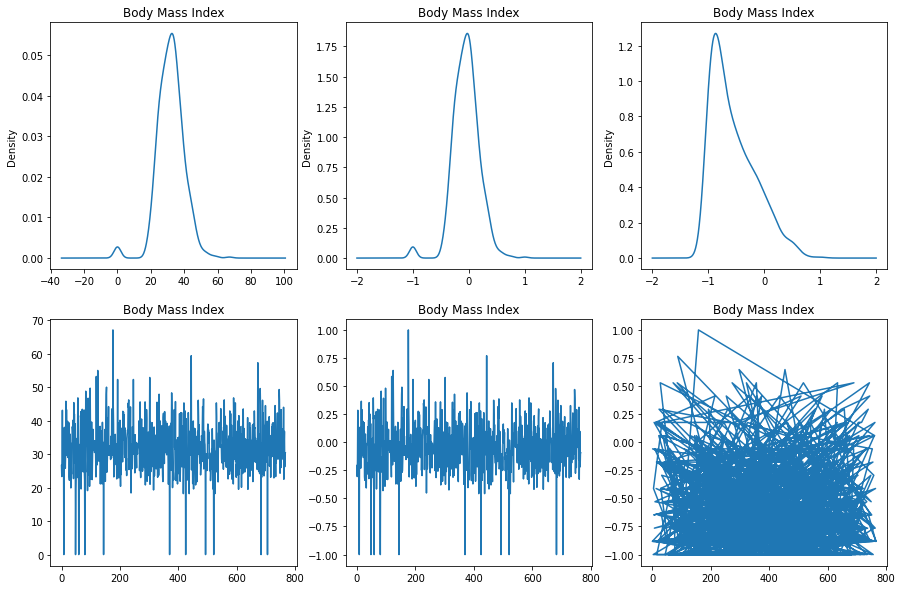

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=3)

dataset.iloc[:,5].plot(figsize=(10,10),ax=axes[0,0],kind = 'density',title = "Body Mass Index")
scaled_frame.iloc[:,5].plot(figsize=(10,10),ax=axes[0,1],kind = 'density',title = "Body Mass Index")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[0,2],kind = 'density',title = "Body Mass Index")

dataset.iloc[:,5].plot(figsize=(10,10),ax=axes[1,0],kind = 'line',title = "Body Mass Index")
scaled_frame.iloc[:,5].plot(figsize=(10,10),ax=axes[1,1],kind = 'line',title = "Body Mass Index")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[1,2],kind = 'line',title = "Body Mass Index")

<AxesSubplot:title={'center':'Diabetes pedigree function'}>

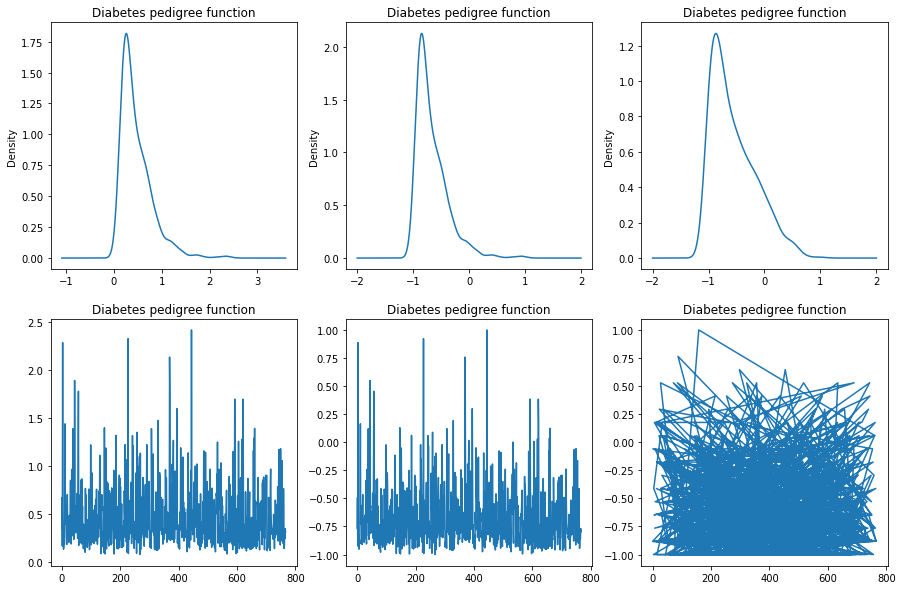

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=3)

dataset.iloc[:,6].plot(figsize=(10,10),ax=axes[0,0],kind = 'density',title = "Diabetes pedigree function")
scaled_frame.iloc[:,6].plot(figsize=(10,10),ax=axes[0,1],kind = 'density',title = "Diabetes pedigree function")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[0,2],kind = 'density',title = "Diabetes pedigree function")

dataset.iloc[:,6].plot(figsize=(10,10),ax=axes[1,0],kind = 'line',title = "Diabetes pedigree function")
scaled_frame.iloc[:,6].plot(figsize=(10,10),ax=axes[1,1],kind = 'line',title = "Diabetes pedigree function")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[1,2],kind = 'line',title = "Diabetes pedigree function")

<AxesSubplot:title={'center':'Age'}>

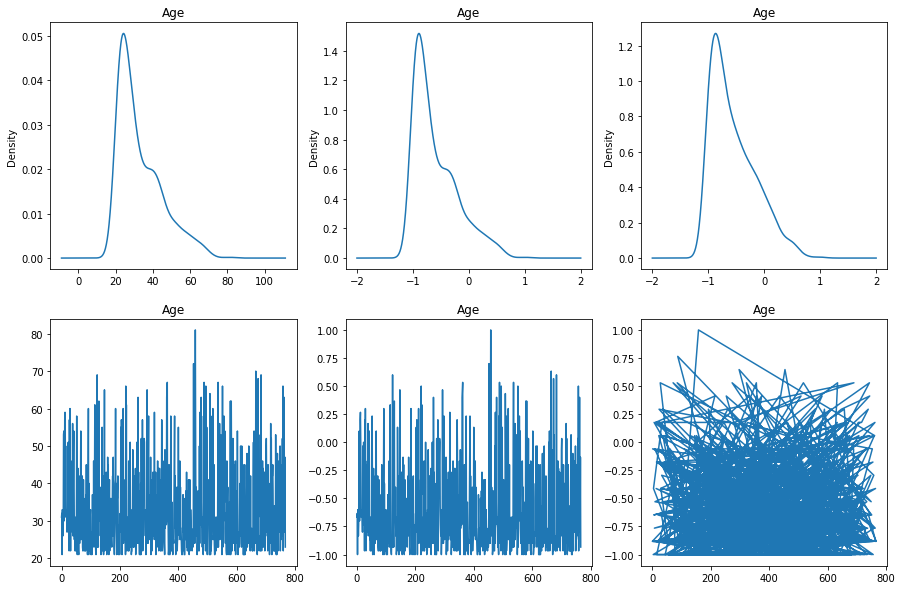

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=3)

dataset.iloc[:,7].plot(figsize=(10,10),ax=axes[0,0],kind = 'density',title = "Age")
scaled_frame.iloc[:,7].plot(figsize=(10,10),ax=axes[0,1],kind = 'density',title = "Age")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[0,2],kind = 'density',title = "Age")

dataset.iloc[:,7].plot(figsize=(10,10),ax=axes[1,0],kind = 'line',title = "Age")
scaled_frame.iloc[:,7].plot(figsize=(10,10),ax=axes[1,1],kind = 'line',title = "Age")
randomised_scale.iloc[:,0].plot(figsize=(15,10),ax=axes[1,2],kind = 'line',title = "Age")